# Homework 2: Coding Part
Due: Mar 2, 2023 at 11:00 pm

Submit through Gradescope

# Before we begin
In NumPy, the name of the game is vectorization. Whenever you have matrices and vectors, try to find an expression for them in terms of matrix manipulations. Then you can implement it NumPy so that *all* values in an array are calulated in one go. Then afterward, you can use appropriate functions (we will use `np.mean` a lot for example) to reduce the arrays. **If you can, it is best to avoid for loops and python control flows.** If you scroll down to Linear Classification with Steepest Descent, you will see a worked out example of how you can do this. 

Why?

Because firstly, the reason NumPy exists is that it has optimized these operations in C++ and is orders of magnitude faster than Python for loops. Secondly, while you can get away with using python control statements now (you will get the right answer so that is not a problem), you **will not** be able to use them with Tensorflow easily. So it is best to practice now. 

Just to be clear, we will not penalize anyone for not using vectorization if they have the right answer. It does remain highly recommended though.



# Import datasets and extract features (copy over from the last homework)
Don't forget to add the bias term to your features.

(***2 POINTS*** for the whole section)

/Users/shreygupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


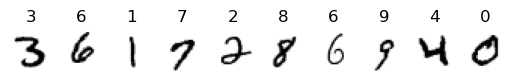

In [1]:
# Import datasets (just run this block)
%matplotlib inline

from sklearn import datasets
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from time import time

# might take a few minutes
digit, target = fetch_openml("mnist_784", return_X_y=True, as_frame=False)
digit = (digit/255.0).reshape(-1,28,28)
target = target.astype(int)
for index, (image, label) in enumerate(list(zip(digit, target))[12:22]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)
plt.show()

The Fantastic Visualization code

In [2]:
# just run this block
import matplotlib.lines as mlines
def newline(weight):
    # adapted from https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
    if len(weight) == 2:
        p1 = weight[0]
        p2 = weight[1]
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()
        if(p2 == 0):
            xmin = xmax = 0
            ymin, ymax = ax.get_ybound()
        else:
            ymax = -p1/p2*(xmax)
            ymin = -p1/p2*(xmin)
        l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = "g", label = "Decision")
        ax.add_line(l)
       
    elif len(weight) == 3:
        p1 = weight[0]
        p2 = weight[1]
        b = weight[2]
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()
        if(p2 == 0):
            xmin = xmax = -b/p1
            ymin, ymax = ax.get_ybound()
        else:
            ymax = -p1/p2*(xmax) - b/p2
            ymin = -p1/p2*(xmin) - b/p2
        l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = "g", label = "Decision")
        ax.add_line(l)
       
    return l

def visualize_model(features, labels, weights):
    plt.figure(figsize=(5,5))
    X_features_a = features[np.where(labels==-1)]
    X_features_b = features[np.where(labels==1)]
    plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.', label = "{}".format(number_a))
    plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.', label = "{}".format(number_b))
    plt.xlabel('feature_a')
    plt.ylabel('feature_b')
    plt.ylim(features[:, 1].min(), features[:, 1].max())
    newline(weights)
    plt.gca().legend(loc = 1)
    return None

Select your champions

In [ ]:
# in this block, you only need to modify number_a and number_b (if you wish to)
from sklearn.model_selection import train_test_split
import numpy as np

number_a = # TODO choose your digit
number_b = # TODO choose your digit

digit_a_indexes = np.where(target==number_a)[0][:300] # to limit data
digit_b_indexes = np.where(target==number_b)[0][:300] # take only 300

targets = np.concatenate((target[digit_a_indexes], target[digit_b_indexes]))
print(targets.shape[0])
images = np.concatenate((digit[digit_a_indexes], digit[digit_b_indexes]))
print(images.shape[0])
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.1, random_state=42)
for index, image in enumerate(X_train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()

Add your trusty feature extractors

In [ ]:
# please complete this function:
def compute_features(vector):
    image = vector.reshape(28, 28) # get back original image shape
    def compute_feature_a(image):
        '''compute_feature_a will compute ...'''

        return

    def compute_feature_b(image):
        '''compute_feature_b will compute ...'''

        return
    
    return compute_feature_a(image), compute_feature_b(image)

In [ ]:
# Apply and plot your features (you can just run this block and inspect the output)

X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_a = X_features[np.where(y_train==number_a)]
X_features_b = X_features[np.where(y_train==number_b)]

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.')
plt.xlabel('feature_a')

plt.ylabel('feature_b')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max()) 

Don't forget those bias terms.

Add them to both - your training and testing data.

In [ ]:
X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_test =  np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

# add a bias term to the features

# convert training and testing labels to -1 and 1


*Now* we can have some fun.

# Linear Classification with Finite Differences

Rather than use pseudo inverse (analytically solving your optimization equation), we can use gradient descent methods to solve our optimization problem. In gradient descent, we see how the loss function changes when we change the weights and move 'downhill' to find the optimal weight for our model.

How do we know where is downhill? We take the gradient of the loss function with respect the to current weight vector. That gives the direction of the change. We then move opposite to that direction ('downhill'). We can numaerically calculate this gradient. Recall that a derivative of a continuous function at some point $x$ is given as: $$ \lim_{δ\to 0} \frac{f(x+δ) - f(x-\delta)}{2δ}$$

We can make use of this.

Concretely, start by initializing your weights parameter `w` to some random numbers. Move `w` some small `delta` amount in the each direction to compute the change in your loss and calculate the gradient. Then update `w` by taking a small step in that gradient direction. You can execute this in a for loop for a set number of iterations, or until the gradient reaches some threshold value of not changing very much.

This method of perturbing the parameters slightly and taking the difference to calculate the gradient is called the method of Finite Differences.

1. Solve for `w`
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps

So, first, implement the loss function. For linear classification, it is the mean squared error. 

In [ ]:
# 4 POINTS for correct implementation
def loss(features, labels, weights):
    return np.inf

### Now iteratively solve for your weights `w`, which includes the bias term.

In [ ]:
# 8 POINTS for correct implementation
w = np.random.rand(3) # init weights to some random value.
num_iterations = 0 # set this to the number of iterations
delta = 1e-5 # This may need to be adjusted
step_size = 1e-4 # This may also need to be adjusted
start_t = time()

for i in range(num_iterations):
    # move w0 some delta and calculate derivative in w0 direction
    # move w1 some delta and calculate derivative in w1 direction
    # move w2 some delta and calculate derivative in w2 direction
    # these three numbers together form the gradient of loss at w
    # update w by taking some step_size in the direction of the gradient going down
    # plot the decision boundary and report accuracies every 20 iterations

end_t = time()
# print final accuracies and plot the decision boundary


In [ ]:
print("average time per iteration: {} seconds".format((end_t-start_t)/num_iterations))

# Logistic Classification with Finite Differences

Now, let's consider the same problem with a different loss function. From problem 2 in the written part, we know that the loss function for a logistic model is:

$$L = \frac{1}{N}\sum_{i=1}^n ln(1 + e^{-y^{(i)}W^{T}x^{(i)}})$$

Use the finite differences method from above to find the optimal `w` for this loss function.

1. Solve for `w`
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps


In [ ]:
# 6 POINTS for correct implementation
def logistic_loss(features, labels, weights):
    return np.inf

In [ ]:
# 6 POINTS for correct implementation
w = np.random.rand(3) # init weights to some random value.
num_iterations = 0 # set this to the number of iterations
delta = 1e-5 # This may need to be adjusted
step_size = 1e-4 # This may also need to be adjusted
# you might need step_size > 1 as we are taking a mean in this loss
start_t = time()

for i in range(num_iterations):
    # move w0 some delta and calculate derivative in w0 direction
    # move w1 some delta and calculate derivative in w1 direction
    # move w2 some delta and calculate derivative in w2 direction
    # these three numbers together form the gradient of loss at w
    # update w by taking some step_size in the direction of the gradient going down
    # plot the decision boundary and report accuracies every 20 iterations

end_t = time()
# print final accuracies and plot the decision boundary


In [ ]:
print("average time per iteration: {} seconds".format((end_t-start_t)/num_iterations))

# Linear Classification with Steepest Descent

How do we make the optimization go faster? 

Right now, we numerically estimate the gradient by perturbing weight values and taking the difference in losses. What that means is that we need two forward passes for every model parameter (so total of 6 passes) to make one weight update. Imagine doing this for a neural network that has millions of parameters. We will need to perturb every one of those values, find the difference in the loss values to estimate gradient, then update the weights (and repeat). But we could actually just find an expression for the gradient analytically, and use that at each step directly instead of estimating the gradient numerically.

So with that in mind, find the gradient of the linear loss function analytically and code it up. Iniitialize your weights parameter `w` to some random numbers. Using your function, find gradient of the loss the function for the current value of the parameter `w` and then update `w` by taking a small step in direction of the steepest gradient. You can execute this in a for loop for a set number of iterations, or until the gradient reaches some threshold value of not changing very much.

1. Solve for `w`
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps

## Define the gradient

**The following example has been worked out for you.**

The loss $L$ we would like to minimize for each $i$ row in our matrix is.

$$L  = \frac{1}{2}\Sigma (y^{(i)} - W^{T}x^{(i)})^{2}$$

where

$$x^{(i)} = 
\begin{bmatrix}
    feature_a \\
    feature_b \\
\end{bmatrix}$$

$$W = 
\begin{bmatrix}
    w_1 \\
    w_2 \\
\end{bmatrix}$$

We need to find the gradient of this loss. Let us vectorize the loss. It basically converts the individual operations into a matrix operation, such that we perform the operation on all datapoints at once.

In matrix form we convert $x^{(i)}$ into $X$ which is the number of examples we have, in our case is MNIST digit features extracted.

$$X = 
\begin{bmatrix}
    feature_{a1} & feature_{b1} \\
    feature_{a2} & feature_{b2} \\
    ... & ... \\
    feature_{ai} & feature_{bi} \\
\end{bmatrix}$$

and the labels become a vector (in this case a vector of the 'pseudo' labels we have 1, and -1)

$$Y = 
\begin{bmatrix}
    label_{1} \\
    label_{2} \\
    ... \\
    label_{i} \\
\end{bmatrix}$$

Then,

$$L  = \frac{1}{2}( Y-XW )^{T} (Y-XW)$$

Analytically, we can find that $$ \frac{d}{dW}L =  - X^{T}Y + X^{T}XW  $$

In [ ]:
def linear_gradient(features, labels, weights):
  # finds the gradient of the loss function wrt the weight vector
  first_term = -features.T@labels
  second_term = features.T@features@weights
  return first_term + second_term

### Now iteratively solve for your weights `w`, which includes the bias term.

In [ ]:
# 10 POINTS for correct implementation
w = np.random.rand(3) # init weights to some random value.
num_iterations = 0 # set this to the number of iterations
step_size = 1e-3 # This may also need to be adjusted
start_t = time()

for i in range(num_iterations):
    # calculate the gradient at the current weight vector
    # update w some step_size in the direction of steepest descent
    # make plots every 20 iters
    
end_t = time()
# print final accuracies and plot the decision boundary


In [ ]:
print("average time per iteration: {} seconds".format((end_t-start_t)/num_iterations))

# Logistic Classification with Steepest Descent

Now we repeat the same process with the **Logistic loss function**. You have (hopefully) analytically calculated the gradient of the Logistic Loss in Problem 2 of the written part. Implement it as a function.

Iniitialize your weights parameter `w` to some random numbers. Using your function, find gradient of the loss the function for the current value of the parameter `w` and then update `w` by taking a small step in direction of the steepest gradient. You can execute this in a for loop for a set number of iterations, or until the gradient reaches some threshold value of not changing very much.

1. Solve for `w`
2. Get training and test accuracy every $n$ steps
3. Plot the decision boundary every $n$ steps

## Define the gradient
Logistic gradient is given as:

\<insert the equation here\>

In [ ]:
# 8 POINTS for correct implementation
def logistic_gradient(features, labels, weights):
    return np.inf

### Now iteratively solve for your weights `w`, which includes the bias term.

In [ ]:
# 4 POINTS for correct implementation
w = np.random.rand(3) # init weights to some random value.
num_iterations = 0 # set this to the number of iterations
step_size = 1e-3 # This may also need to be adjusted
start_t = time()

for i in range(num_iterations):
    # calculate the gradient at the current weight vector
    # update w some step_size in the direction of steepest descent
    # make plots every 20 iters
    
end_t = time()
# print final accuracies and plot the decision boundary


In [ ]:
print("average time per iteration: {} seconds".format((end_t-start_t)/num_iterations))

Was Steepest Descent a faster approach? Since visualization takes a long time, commenting it out from the loop will improve your estimate for time taken. Also if you use the %timeit magic, you will get a better estimate. (2 ***POINTS*** for a short analysis)

\<Your Answer here>

Feel free to use up more space or code blocks.